Predicting Subscription Based on Age, Experience, and Hours Played
- 
### Data analysis on PLAIcraft using the K-Nearest Neighbours Algorithm
- Project Group 007-11

In [1]:
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)

set.seed(888)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Introduction 
-

In this day and age, Minecraft is one of the most popular video games, attracting a large volume of diverse players each year. PLAIcraft, set up by a Computer Science research group at UBC, is a Minecraft-like server being used as a real data science project with real stakeholders. By analysing PLAIcraft players’ statistics, we can gain insight on these players and make predictions about their behaviour. This information is crucial for video game developers in regards to maintaining high engagement and subscription levels, as well as informing their recruitment efforts and resource allocation. By analysing player statistics, developers can easily identify who their target audience should be in order to maximise engagement and subscription levels. 

This study aims to explore which player characteristics and behaviours are most predictive of subscribing to a game-related newsletter. Specifically, can experience level, age, and hours played predict whether a player subscribes to the newsletter? For this study, the data sets used were players.csv and sessions.csv. However, players.csv was the main data set used throughout the project, as the dataset contains information on player demographics, engagement levels, and subscription status, allowing us to use K-Nearest Neighbors (K-NN) classification to identify patterns in player behaviour. The players.csv dataset represents unique players participating in a Minecraft-like gameplay study, and includes 196 observations with 7 variables: 
* experience (chr): Player expertise (Amateur, Regular, Veteran, Pro)
* subscribe (lgl): Subscribed (TRUE/FALSE)
* hashedEmail (chr): Hashed identifier for privacy
* played_hours (dbl): Total hours played (0.1–223.1, mean 5.85)
* name (chr): Player name who participate
* gender (chr): Gender identity
* age (dbl): Ranges 8–50 (mean 20.52), with 2 missing values 


Methods
- 
*Methods will be provided in markdown cells throughout the notebook*

In order to accurately predict the subscription behaviour of game players, this experiment will include using the K-nearest Neighbours (K-NN) classification to identify the players behaviours. K-NN is a simple, intuitive algorithm that makes predictions based on the closest similar observations and is effective for our non-linear relationships. Players with similar characteristics (age, experience, hours played) have similar subscription behaviour. 

First, we loaded the dataset and wrangled it to a usable format. Filtering for relevant variables, we selected the predictor variables of age, experience, and hours_played, along with the response variable of subscribe. Additionally, we dropped missing values for these variables and mutated to factor-type for use in the K-NN algorithm. 

In [2]:
players <- read_csv("https://raw.githubusercontent.com/jxiao888/DSCI-Group-Project/refs/heads/main/players%20(1).csv")
head(players)
players <- players |> rename_with(tolower)
players <- players |>
drop_na() |>
mutate(across(c(experience, subscribe), as.factor))

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
players_select <- players |> 
    select(subscribe, experience, played_hours, age) 
head(players_select)

subscribe,experience,played_hours,age
<fct>,<fct>,<dbl>,<dbl>
TRUE,Pro,30.3,9
TRUE,Veteran,3.8,17
FALSE,Veteran,0.0,17
TRUE,Amateur,0.7,21
TRUE,Regular,0.1,21
TRUE,Amateur,0.0,17


Next, we created visualizations of the dataset in a way that was relevant for conducting exploratory data analysis, including a histogram (to analyse the distribution of played_hours), a box plot (to demonstrate age distribution by the subscription status in order to identify any potential age-related trends), and a bar chart (to visually demonstrate players' experience levels and their subscription rates). 

Exploratory Visualizations 
-

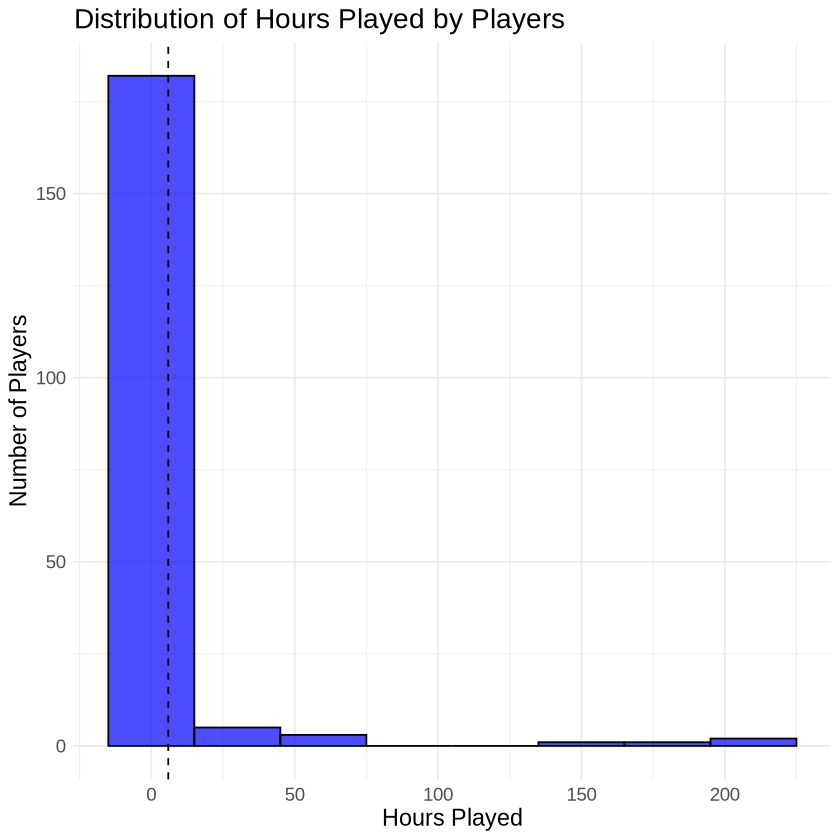

In [4]:
played_hours_hist <- ggplot(players, aes(x = played_hours)) +
    geom_histogram(binwidth = 30, fill = "blue", alpha = 0.7, color = "black") +
    geom_vline(xintercept = mean(players$played_hours, na.rm = TRUE),
    linetype = "dashed") +
    labs(x = "Hours Played", y = "Number of Players", title = "Distribution of Hours Played by Players") +
    theme_minimal() +
    theme(text = element_text(size = 14))
played_hours_hist


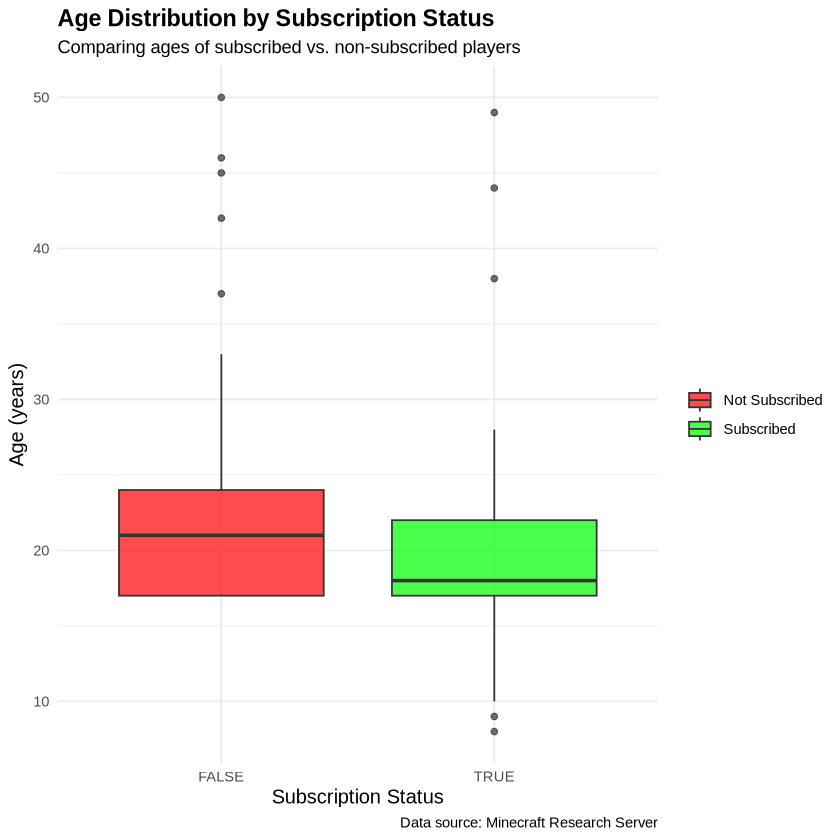

In [5]:
boxplot_age_subscribe <- ggplot(players, aes(x = as.factor(subscribe), y = age, fill = as.factor(subscribe))) +
    geom_boxplot(alpha = 0.7) +
    scale_fill_manual(values = c("red", "green"), labels = c("Not Subscribed", "Subscribed")) +
    labs( x = "Subscription Status", 
         y = "Age (years)", 
         title = "Age Distribution by Subscription Status", 
         subtitle = "Comparing ages of subscribed vs. non-subscribed players", 
         caption = "Data source: Minecraft Research Server") +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 14),
    axis.title = element_text(size = 12),
    legend.title = element_blank())
boxplot_age_subscribe


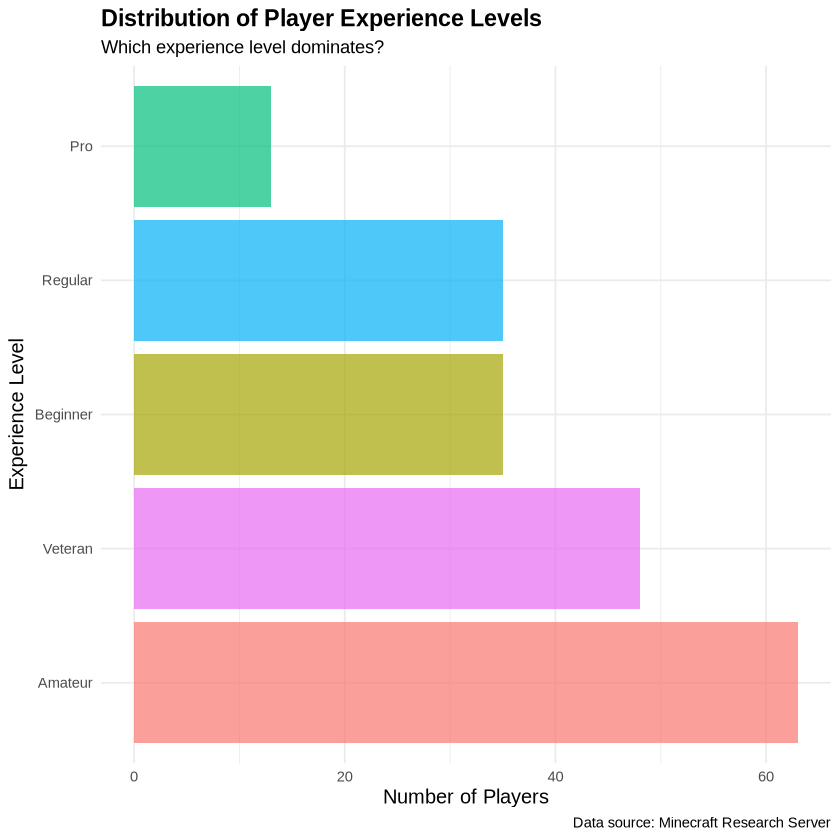

In [6]:
bar_experience <- ggplot(players, aes(x = reorder(experience, experience, function(x) -length(x)), fill = experience)) +
    geom_bar(alpha = 0.7) +
    labs(x = "Experience Level",
         y = "Number of Players",
         title = "Distribution of Player Experience Levels",
         subtitle = "Which experience level dominates?",
         caption = "Data source: Minecraft Research Server") +
    theme_minimal() +
    coord_flip() +
    theme(plot.title = element_text(face = "bold", size = 14),
    axis.title = element_text(size = 12), legend.position = "none")
bar_experience


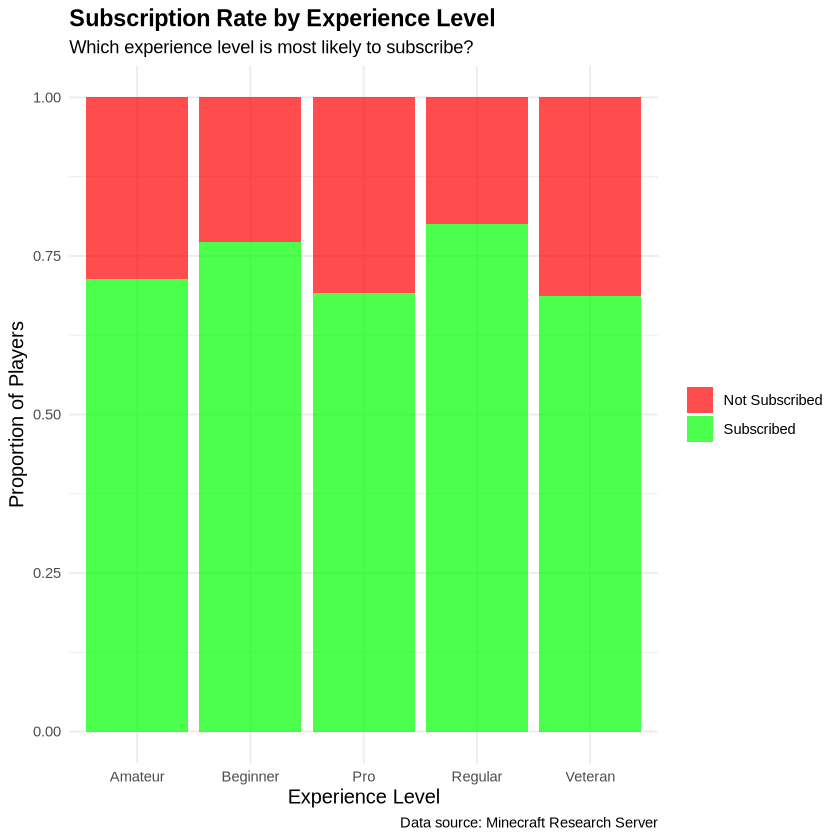

In [7]:
subscribe_experience <- ggplot(players, aes(x = experience, fill = as.factor(subscribe))) +
    geom_bar(position = "fill", alpha = 0.7) +
    scale_fill_manual(values = c("red", "green"), labels = c("Not Subscribed", "Subscribed")) +
    labs(x = "Experience Level", 
         y = "Proportion of Players", 
         title = "Subscription Rate by Experience Level", 
         subtitle = "Which experience level is most likely to subscribe?", 
         caption = "Data source: Minecraft Research Server") +
    theme_minimal() +
    theme(plot.title = element_text(face = "bold", size = 14),
    axis.title = element_text(size = 12),
    legend.title = element_blank())
subscribe_experience


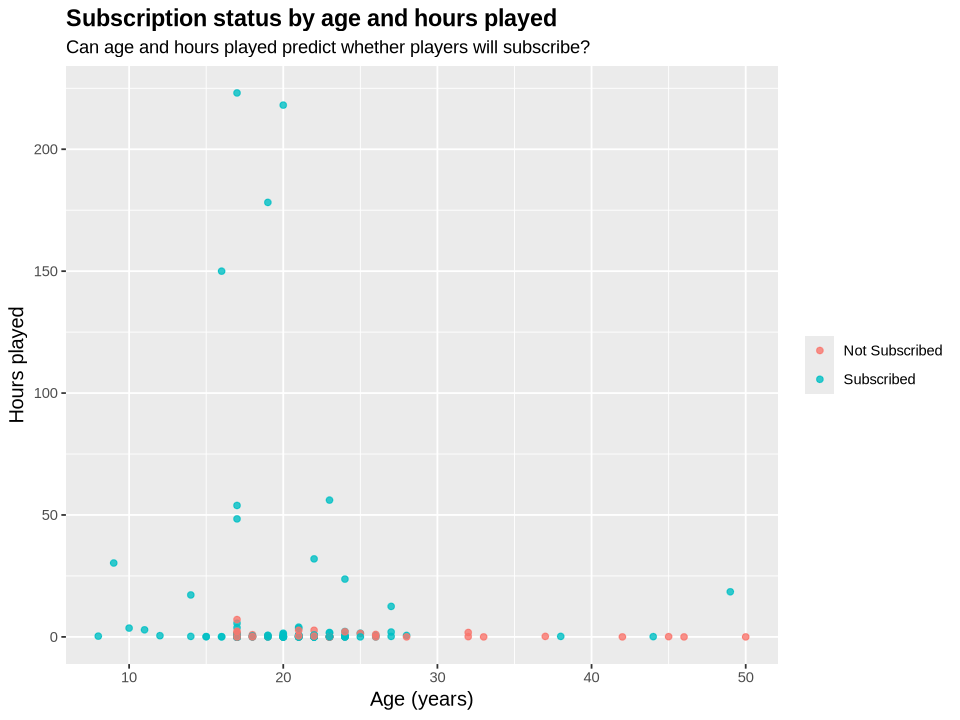

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)
age_hours_plot <- ggplot(players, aes(x = age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.8) +
    scale_color_discrete(labels = c("Not Subscribed", "Subscribed")) +
    labs(x = "Age (years)", y = "Hours played", color = "Subscription status",
         title = "Subscription status by age and hours played",
         subtitle = "Can age and hours played predict whether players will subscribe?") +
    theme(plot.title = element_text(face = "bold", size = 14),
        axis.title = element_text(size = 12),
        legend.title = element_blank())
age_hours_plot

# Data Analysis 

The modified players.csv dataset was split into training and testing sets, with a 75:25 ratio. 

The training set was further split into a training subset and validation set for cross-validation (with the same ratio). 

In [9]:
set.seed(888)

players_split <- initial_split(players_select, prop = 0.75, strata = subscribe) 
players_train <- training(players_split) 
players_test <- testing(players_split) 

players_cross_split <- initial_split(players_train, prop = 0.75, strata = subscribe)
players_subtrain <- training(players_cross_split) 
players_validation <- testing(players_cross_split)

A recipe was created to predict subscription based on age, experience, and hours played. Standardisation and centering was applied to numeric predictors (age, hours_played) to ensure fair distance calculations for K-NN classification. 

Five-fold cross-validation conducted to choose the optimal K-value. 



#### Cross-Validation

Warning message:
“tune samples were requested but there were 108 rows in the data. 103 will be used.”


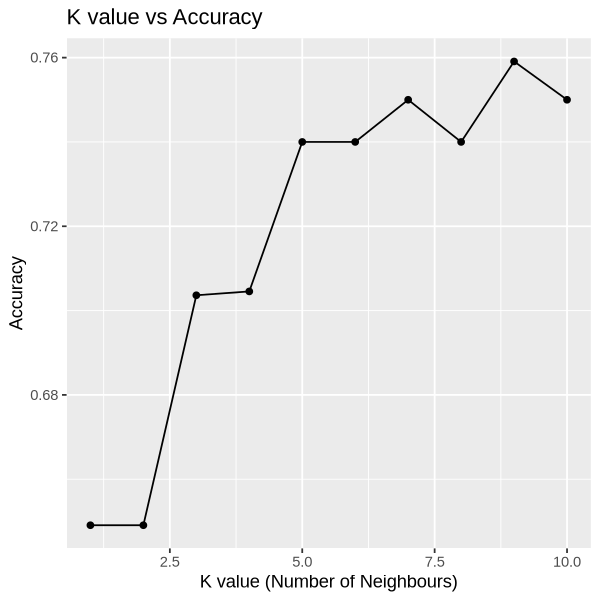

In [10]:
set.seed(1111)
players_recipe <- recipe(subscribe ~ . , data = players_subtrain) |> 
    step_scale(played_hours, age) |> 
    step_center(played_hours, age) 

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

train_fit <- workflow() |>
             add_recipe(players_recipe) |>
             add_model(players_spec) |>
             fit(data = players_subtrain)

players_vfold <- vfold_cv(players_subtrain, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

tuning <- train_fit |> 
    tune_grid(resamples = players_vfold, grid = k_vals)
metrics <- collect_metrics(tuning)

options(repr.plot.width = 5, repr.plot.height =5)
cross_val_plot <- metrics |> 
    filter(.metric == "accuracy") |> 
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() + 
    geom_line() + 
    labs(x = "K value (Number of Neighbours)", y = "Accuracy", title = "K value vs Accuracy") 

cross_val_plot

In [11]:
accuracies <- metrics |> 
    filter(.metric == "accuracy")

best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 9

Using this K-value, the model was trained by fitting it to the training set to make predictions based on relationships observed within that data. The model was then fitted to the test set, and the accuracy of our K-NN model was evaluated based on its number of correct predictions compared to its number of total predictions. 


### Training with optimal K

In [12]:
players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
            set_engine("kknn") |>
            set_mode("classification")

players_fit <- workflow() |>
             add_recipe(players_recipe) |>
             add_model(players_best_spec) |>
             fit(data = players_train)
players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2758621
Best kernel: rectangular
Best k: 9

### Predictions and accuracy on test set 

In [13]:
players_test_predictions <- predict(players_fit, players_test) |>
  bind_cols(players_test) 
head(players_test_predictions)

players_metrics <- players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")
players_metrics

.pred_class,subscribe,experience,played_hours,age
<fct>,<fct>,<fct>,<dbl>,<dbl>
TRUE,TRUE,Amateur,0.7,21
TRUE,TRUE,Amateur,0.0,17
TRUE,FALSE,Amateur,0.0,21
TRUE,TRUE,Beginner,1.5,25
TRUE,TRUE,Amateur,0.7,21
TRUE,TRUE,Regular,0.0,17


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


### Visualization of data analysis
A confusion matrix was created as a visualization of the analysis. 

In [14]:
players_conf_mat <- players_test_predictions |>
        conf_mat(truth = subscribe, estimate = .pred_class)
players_conf_mat 

          Truth
Prediction FALSE TRUE
     FALSE     2    2
     TRUE     11   34

Discussion
- 

### Summary of Findings
This study identifies whether player characteristics—specifically experience level, age, and hours played—can predict subscription to a game-related newsletter. Using K-Nearest Neighbors (K-NN) classification, we trained and tested a predictive model on the players.csv dataset. As part of our analysis, we performed five-fold cross-validation to determine the optimal value of KK, the number of neighbors. As shown, model accuracy steadily increased with larger values of KK, peaking at K=9 with a cross-validation accuracy of approximately 76%.

Using this optimal value, we trained our final model on the full training set and evaluated its performance on the test set. The model achieved a test accuracy of 73.5%, indicating a reasonably strong performance given the simplicity of the model and the limited number of predictors. However, a deeper look into the confusion matrix revealed a performance imbalance: while the model successfully identified most subscribers (34 out of 36), it struggled significantly with non-subscribers, correctly classifying only 2 out of 13. This imbalance suggests that the model is biased toward the majority class (subscribers) and lacks sufficient power to accurately classify the minority class.

### Interpretation of Results
The classification results indicate that the selected features such as experience level, age, and hours played, provide limited variation and class separation, which impacts the predictive performance of the model. A key reason for this is that most players are concentrated within similar ranges of age and total hours played. The histogram of played hours showed that the vast majority of players logged fewer than 10 total hours of gameplay, indicating that most of the dataset consists of casual or early-stage players. Similarly, the age distribution is fairly narrow, with most players in the teenage or early adulthood range.

The experience level variable was also unevenly distributed, with most players classified as "Amateur" or "Veteran" and only a few labeled as "Pro." This skew limits the model’s ability to use experience level as a meaningful predictor. Furthermore, Subscription status by age and hours played  figure illustrates that there is significant overlap between subscribers and non-subscribers across both axes. No clear boundary separates the two groups, and the few data points that fall outside the main cluster (e.g., very high playtime values) do not form a distinct pattern.

Together, these characteristics suggest that while there may be a loose association between engagement and subscription, the three predictors alone are insufficient to form strong, generalizable patterns that the model can learn from. The K-NN algorithm relies on identifying nearby observations with similar features; when those features are not informative or highly clustered, the model’s predictions tend to default to the majority class.

### Insights and Implications
While our model achieved moderate overall accuracy, its inability to classify non-subscribers with high accuracy highlights an important limitation: the lack of feature richness and class balance. In machine learning, especially with classification tasks, success often depends less on the complexity of the model and more on the quality and variability of the data.
From a real-world perspective, this finding has several implications for game developers and marketing teams. First, it demonstrates that simple demographic and usage metrics (such as age and total hours played) may not be sufficient to guide subscription strategies or targeted engagement campaigns. These features are too coarse to capture the nuanced behaviors and motivations that likely drive a player’s decision to subscribe.

To improve predictive power and enable more personalized recommendations or messaging, game developers should consider collecting more behaviorally-rich data. This includes metrics such as:
* Session frequency and duration
* Time-of-day activity patterns
* Achievement milestones
* Social interaction (e.g., multiplayer activity)
* Communication preferences or in-game purchases

Such features can help build a more comprehensive picture of a player’s engagement level and interests, leading to more accurate predictions and more effective marketing strategies.

### Future Directions
This project lays the groundwork for several potential improvements in both data processing and modeling approaches. Future work could benefit from the following extensions:
* Incorporating session data: While our current analysis primarily relied on players.csv, the sessions.csv file contains valuable behavioral data that could enhance model performance. By summarizing features like average session length, total number of sessions, and session timing patterns, we could capture more dynamic and relevant indicators of player engagement.
* Exploring alternative models: K-NN is a simple and interpretable algorithm, but other classification models—such as logistic regression, decision trees, or ensemble methods (e.g., random forests)—may handle class imbalance and feature interactions more effectively. These models may also provide insight into feature importance, which could guide future data collection efforts.
* Addressing class imbalance: The strong skew toward subscribers reduced the model’s ability to generalize. Techniques like oversampling the minority class, using SMOTE (Synthetic Minority Over-sampling Technique), or adjusting classification thresholds could help balance predictive performance across classes.
* Feature engineering: Creating new features from existing variables, such as experience-to-age ratios or playtime per session (from the sessions dataset), could provide more informative inputs to the model.
* Larger or more diverse datasets: Expanding the dataset to include a broader range of players, possibly from different servers or game types, could provide more variation and help uncover stronger predictive signals.
